Note that many columns have 0 non-null values. i.e. they are empty!
This is likely because either the kind of tweets we're collecting don't have that information, or its
an old key left in by the API that Twitter no longer uses.

Let's clean them up using our `.dropna()` method, but unlike in the past this time we're going to drop entire columns.

In [ ]:
# Here we specifty to drop from the columns axis, and say that we only want to drop it if all the values are missing.
# here we just end with .info to take a look at the impact before we commit to it.
unpacked_df.dropna(axis='columns', how='all').info()

In [ ]:
# ok looks good let's commit to it. Overwrite easier_df with the dropped column version

unpacked_df = unpacked_df.dropna(axis='columns', how='all')

<AxesSubplot:>

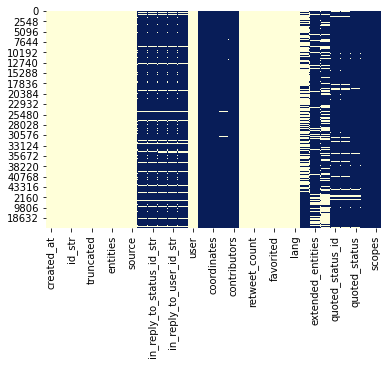

In [29]:
sns.heatmap(df.isnull(), cbar=False,cmap="YlGnBu")

## 3.2 Handling Nested Data

So now our DataFrame has been extended with more tweets extracted from the nested data under `retweeted_status`.

However for those parts of the results that had embedded dictionaries such as the `user` section or the `retweeted_status` section Pandas is still storing those as objects inside each cell as a dictionary. It used to be the case that we would need multiple stages to unpack all of this data. Luckily the latest version of Pandas has a method to handle this elegantly.

- `pd.json_normalize()`

In [20]:
test = df.to_dict(orient='records')

In [22]:
unpacked_df = pd.json_normalize(df.to_dict(orient='records'))

/Users/James/anaconda3/envs/teaching/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [25]:
entities = df[['id', 'entities']].to_dict(orient='records')
pd.json_normalize(entities)

,id,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,entities.media
0,1329439968775778304,[],[],"[{'screen_name': 'AndreVesely', 'name': 'Andre...",[],NaN
1,1329439968012496898,[],[],"[{'screen_name': 'TaylorRMarshall', 'name': 'D...",[],NaN
2,1329439967685337091,[],[],"[{'screen_name': 'WentRogue', 'name': 'Stacey ...",[],NaN
3,1329439967190405126,"[{'text': 'COVID19', 'indices': [44, 52]}]",[],"[{'screen_name': 'theAAG', 'name': 'American A...",[],NaN
4,1329439967135879174,"[{'text': 'Covid', 'indices': [72, 78]}]",[],"[{'screen_name': 'Warnstar_Print', 'name': 'Wa...",[],NaN
...,...,...,...,...,...,...
53500,1329431559020052480,[],[],[],"[{'url': 'https://t.co/5BkxEnaW17', 'expanded_...",NaN
53501,1329098221839376385,[],[],[],[],NaN
53502,1329379704474923008,"[{'text': 'SocEnt', 'indices': [125, 132]}, {'...",[],"[{'screen_name': 'creditunionie', 'name': 'Cre...",[],"[{'id': 1329379698623860736, 'id_str': '132937..."
53503,1329429428733177856,[],[],[],"[{'url': 'https://t.co/mqE0t1OLio', 'expanded_...",NaN


In [23]:
unpacked_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53505 entries, 0 to 53504
Data columns (total 363 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   created_at                                                              53505 non-null  object 
 1   id                                                                      53505 non-null  int64  
 2   id_str                                                                  53505 non-null  object 
 3   full_text                                                               53505 non-null  object 
 4   truncated                                                               53505 non-null  bool   
 5   display_text_range                                                      53505 non-null  object 
 6   source                                                                  53505

In [ ]:
# Save the tweets to disk

unpacked_df.to_csv('brexit_tweets.csv', index=False)